In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("IRIS.csv")

In [3]:
print("Shape of Iris Dataset: ",dataset.shape)

Shape of Iris Dataset:  (150, 5)


In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

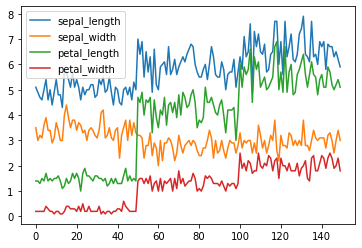

In [6]:
dataset.plot() 

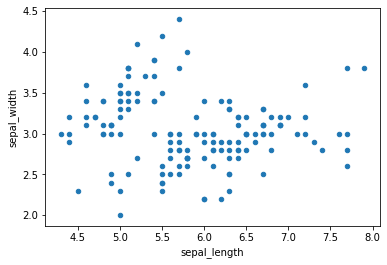

In [7]:
dataset.plot(kind = "scatter",x="sepal_length",y="sepal_width")

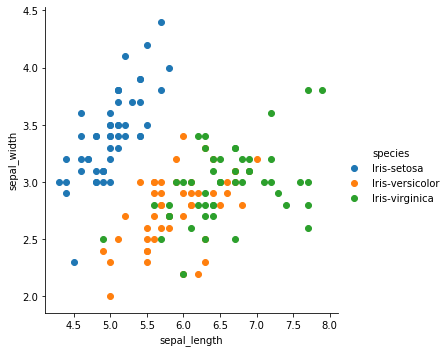

In [10]:
sns.FacetGrid(dataset,hue="species",height=5).map(plt.scatter,"sepal_length","sepal_width").add_legend()

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7f8ab0cd9250>>

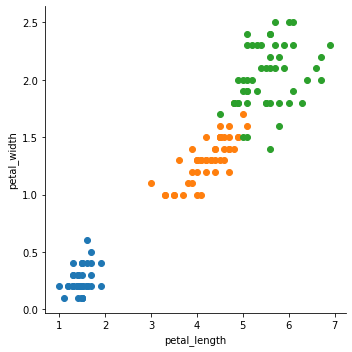

In [11]:
sns.FacetGrid(dataset,hue="species",height=5).map(plt.scatter,"petal_length","petal_width").add_legend

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7f8ab0c07cd0>>

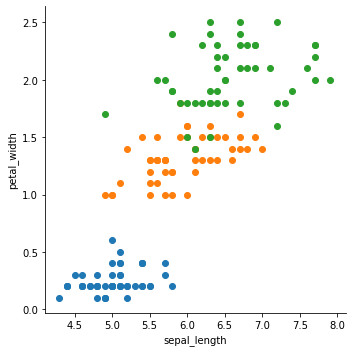

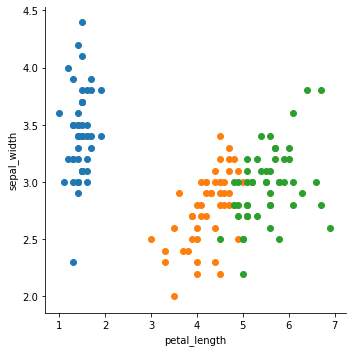

In [12]:
sns.FacetGrid(dataset,hue="species",height=5).map(plt.scatter,"sepal_length","petal_width").add_legend
sns.FacetGrid(dataset,hue="species",height=5).map(plt.scatter,"petal_length","sepal_width").add_legend

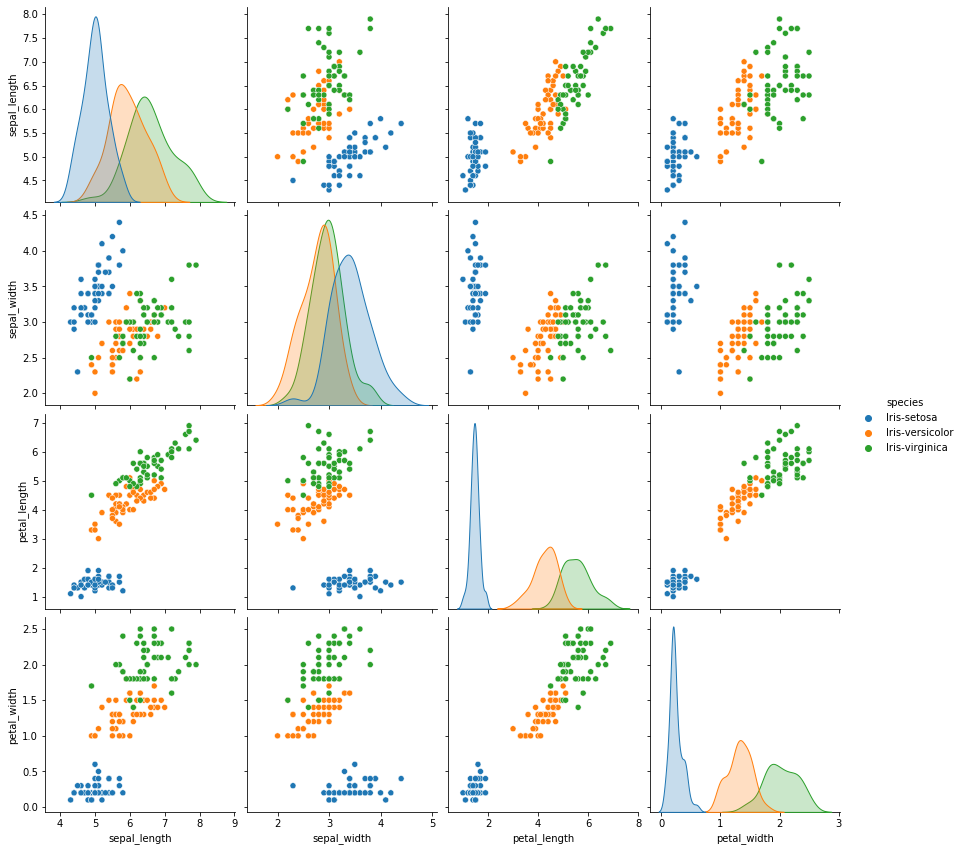

In [14]:
sns.pairplot(dataset,hue="species",height=3)
plt.show()

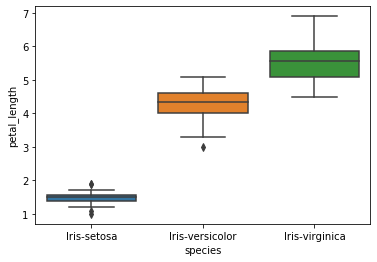

In [15]:
sns.boxplot(y="petal_length",x="species",data=dataset)

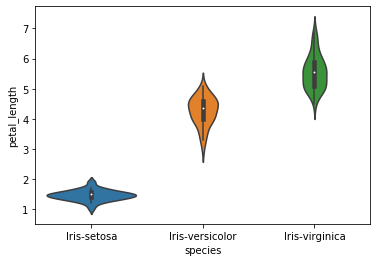

In [16]:
sns.violinplot(y="petal_length",x="species",data=dataset)

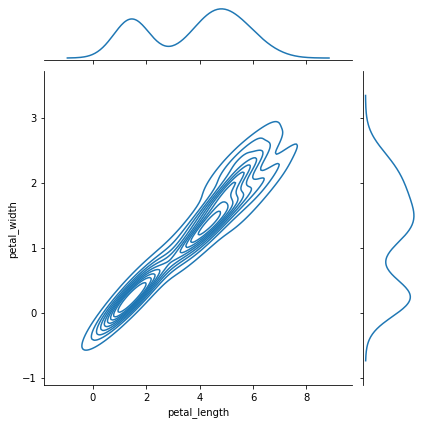

In [17]:
sns.jointplot(x="petal_length",y="petal_width",data=dataset,kind="kde")

In [18]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
dataset.species.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression   
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.tree import DecisionTreeClassifier       
from sklearn import metrics                           
from sklearn import svm 

In [26]:
train, test = train_test_split(dataset, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [27]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]
train_Y=train.species
test_X= test[['sepal_length','sepal_width','petal_length','petal_width']]
test_Y =test.species

In [28]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
70,5.9,3.2,4.8,1.8
99,5.7,2.8,4.1,1.3
89,5.5,2.5,4.0,1.3
10,5.4,3.7,1.5,0.2


In [29]:
train_Y.head()

126     Iris-virginica
70     Iris-versicolor
99     Iris-versicolor
89     Iris-versicolor
10         Iris-setosa
Name: species, dtype: object

In [30]:
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
144,6.7,3.3,5.7,2.5
117,7.7,3.8,6.7,2.2
97,6.2,2.9,4.3,1.3
140,6.7,3.1,5.6,2.4


In [31]:
test_Y.head()

137     Iris-virginica
144     Iris-virginica
117     Iris-virginica
97     Iris-versicolor
140     Iris-virginica
Name: species, dtype: object

In [33]:
model = svm.SVC(gamma='scale')
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print("The accuracy of the SVM is ",metrics.accuracy_score(prediction,test_Y))

The accuracy of the SVM is  0.9555555555555556


In [35]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print("The accuracy of the Logistic Regression is ",metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is  0.9555555555555556


In [36]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print("The accuracy of the Decision Tree is ",metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is  0.9555555555555556


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [37]:
model = KNeighborsClassifier(n_neighbors = 3) #Examines 3 neighbours
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print("The accuracy of the KNN is ",metrics.accuracy_score(prediction,test_Y))

The accuracy of the KNN is  0.9555555555555556


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [38]:
petal=dataset[['petal_width','petal_length','species']]

In [39]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal_width','petal_length']]
train_y_p=train_p.species
test_x_p=test_p[['petal_width','petal_length']]
test_y_p=test_p.species

In [40]:
model=svm.SVC(gamma='scale')
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the SVM using Petals is: 0.9777777777777777


In [41]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777


In [42]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [43]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the KNN using Petals is: 0.9777777777777777


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [ ]:
#OBSERVATIONS
# K- Neighbor Classifier gives best accuracy on Iris Dataset as Compared to other datasets.
# Using petal length and petal width gives us more accuracy.
# If we have used sepal length and sepal width accuracy would have been less.
